# Decsion tree example 3

This is a simple example showing a decsion tress and random forest using the Kyphosis dataset. 
 
The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. This data frame contains the following columns: Kyphosis, which is a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation, age in months, number of vertebrae involved, start, the number of the first (topmost) vertebra operated on. Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA. [link](https://rdrr.io/cran/rpart/man/kyphosis.html)

Objectiv: Create a model which classifies the presence or adsence of the Kyphosis after operation based on the three variables age, number and start. 


## Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data

Simple data checks



In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [42]:
df.shape

(81, 4)

In [44]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

It is important to do a some correlation checks and familarise with the data first. 

In [9]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


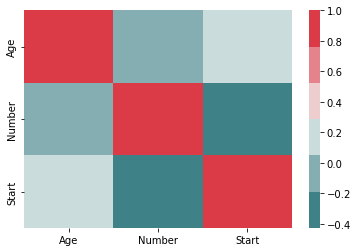

In [45]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=False, cmap=sns.diverging_palette(200, 10))
plt.show()

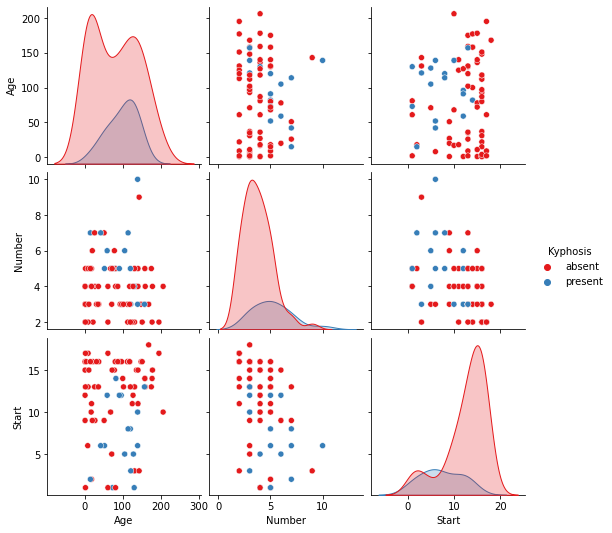

In [28]:
sn.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

We are going to spilt now first our dataset into training and test datasets. Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [30]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


## Decision Tree

In [61]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [62]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [63]:
predictions = dtree.predict(X_test)

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.79      0.81        19
     present       0.43      0.50      0.46         6

    accuracy                           0.72        25
   macro avg       0.63      0.64      0.64        25
weighted avg       0.74      0.72      0.73        25



In [65]:
print(confusion_matrix(y_test,predictions))

[[15  4]
 [ 3  3]]


## Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

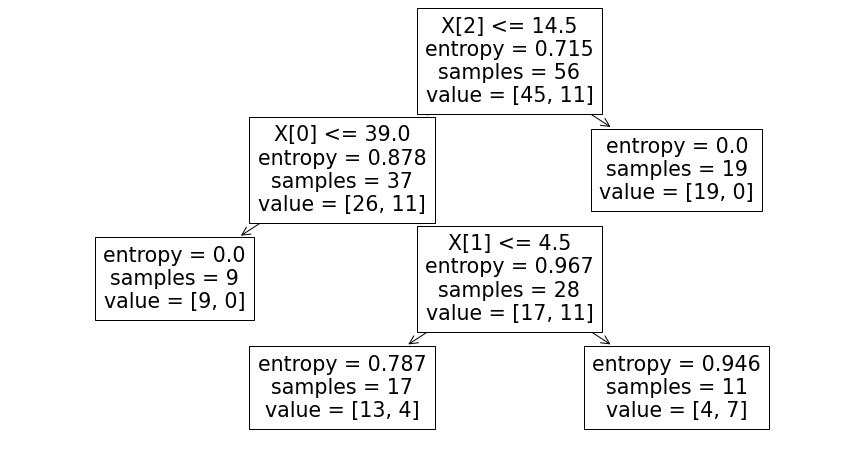

In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (15, 8))

tree.plot_tree(dtree) 
plt.show()

In [49]:
from sklearn.tree import export_graphviz
from IPython.display import Image  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [57]:
rfc_pred = rfc.predict(X_test)

In [58]:
print(confusion_matrix(y_test,rfc_pred))

[[13  1]
 [ 0  3]]


In [59]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      0.93      0.96        14
     present       0.75      1.00      0.86         3

    accuracy                           0.94        17
   macro avg       0.88      0.96      0.91        17
weighted avg       0.96      0.94      0.94        17

